In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
data = pd.read_csv("./data/csv/661k_compressed_size.csv",header=None, sep = "\t", names = ['size_Mb','name'], index_col = 'name')
data = data.drop('./_md5.txt')
data = data.drop('total')
species_name = [name[2:-11] for name in data.index]
data['species'] = species_name

In [3]:
data.loc[:,'size_Mb']

name
./acinetobacter_baumannii__01.tar.xz                              113
./acinetobacter_baumannii__02.tar.xz                               42
./acinetobacter_nosocomialis__01.tar.xz                            14
./acinetobacter_pittii__01.tar.xz                                  23
./actinobacillus_pleuropneumoniae__01.tar.xz                        6
                                                                 ... 
./wolbachia_endosymbiont_of_drosophila_melanogaster__01.tar.xz      1
./xanthomonas_oryzae__01.tar.xz                                    21
./yersinia_enterocolitica__01.tar.xz                               37
./yersinia_pestis__01.tar.xz                                        8
./yersinia_pseudotuberculosis__01.tar.xz                           14
Name: size_Mb, Length: 305, dtype: int64

In [4]:
data.index.values

array(['./acinetobacter_baumannii__01.tar.xz',
       './acinetobacter_baumannii__02.tar.xz',
       './acinetobacter_nosocomialis__01.tar.xz',
       './acinetobacter_pittii__01.tar.xz',
       './actinobacillus_pleuropneumoniae__01.tar.xz',
       './aeromonas_hydrophila__01.tar.xz',
       './aeromonas_salmonicida__01.tar.xz',
       './aeromonas_veronii__01.tar.xz',
       './bacillus_anthracis__01.tar.xz', './bacillus_cereus__01.tar.xz',
       './bacillus_subtilis__01.tar.xz',
       './bacillus_thuringiensis__01.tar.xz',
       './bacteroides_fragilis__01.tar.xz',
       './bordetella_bronchiseptica__01.tar.xz',
       './bordetella_pertussis__01.tar.xz',
       './borreliella_burgdorferi__01.tar.xz',
       './brucella_abortus__01.tar.xz',
       './brucella_melitensis__01.tar.xz', './brucella_suis__01.tar.xz',
       './burkholderia_cenocepacia__01.tar.xz',
       './burkholderia_cepacia__01.tar.xz',
       './burkholderia_contaminans__01.tar.xz',
       './burkholderia_gladio

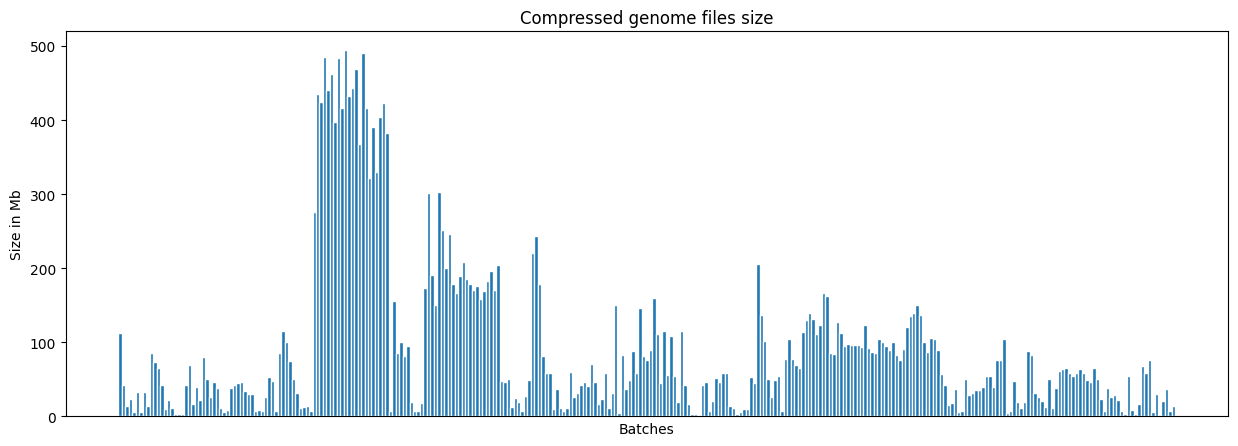

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))

df_plot = data.loc[:,'size_Mb']

files = df_plot.index.values
sizes = df_plot.values
# bar_labels = ['red', 'blue', '_red', 'orange']
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

# ax.bar(files, counts, label=bar_labels, color=bar_colors)
ax.bar(files, sizes,width=1, ec = 'white')

ax.set_ylabel('Size in Mb')
ax.set_title('Compressed genome files size')
ax.set_xlabel('Batches')
plt.xticks([])

plt.show()

In [11]:
df_group_by_species = data.groupby('species').sum()
df_group_by_species = df_group_by_species.sort_values(by = 'size_Mb',ascending = False)
simple_colors_9500 = {
    "Red": "#e6194B",
    "Green": "#3cb44b",
    "Yellow": "#ffe119",
    "Blue": "#4363d8",
    "Orange": "#f58231",
    "Purple": "#911eb4",
    "Cyan": "#42d4f4",
    "Magenta": "#f032e6",
    "Lime": "#bfef45",
    "Pink": "#fabed4",
    "Teal": "#469990",
    "Lavender": "#dcbeff",
    "Brown": "#9A6324",
    "Beige": "#fffac8",
    "Maroon": "#800000",
    "Mint": "#aaffc3",
    "Olive": "#808000",
    "Apricot": "#ffd8b1",
    "Navy": "#000075",
    "Grey": "#a9a9a9",
    "Black": "#000000",
    "White": "#ffffff",
}

selected_colors = list(simple_colors_9500.keys())[:10]
print(selected_colors)
colors = selected_colors[:10] + ['black']*(len(df_group_by_species)-10)
df_group_by_species['color'] = colors

['Red', 'Green', 'Yellow', 'Blue', 'Orange', 'Purple', 'Cyan', 'Magenta', 'Lime', 'Pink']


In [12]:
df_group_by_species.head(10)

,size_Mb,color
species,,
dustbin,9190,Red
salmonella_enterica,4816,Green
escherichia_coli,4404,Yellow
mycobacterium_tuberculosis,1190,Blue
klebsiella_pneumoniae,724,Orange
streptococcus_pneumoniae,722,Purple
staphylococcus_aureus,633,Cyan
clostridioides_difficile,377,Magenta
pseudomonas_aeruginosa,343,Lime


In [13]:
colors_dict = dict(map(lambda i,j : (i,j) , df_group_by_species.index,colors))
data['colors'] = data['species'].map(colors_dict)
[color.lower() for color in data.loc[:,'colors'].values]
list(df_group_by_species.index.values[:10]) + ['other']

['dustbin',
 'salmonella_enterica',
 'escherichia_coli',
 'mycobacterium_tuberculosis',
 'klebsiella_pneumoniae',
 'streptococcus_pneumoniae',
 'staphylococcus_aureus',
 'clostridioides_difficile',
 'pseudomonas_aeruginosa',
 'listeria_monocytogenes',
 'other']

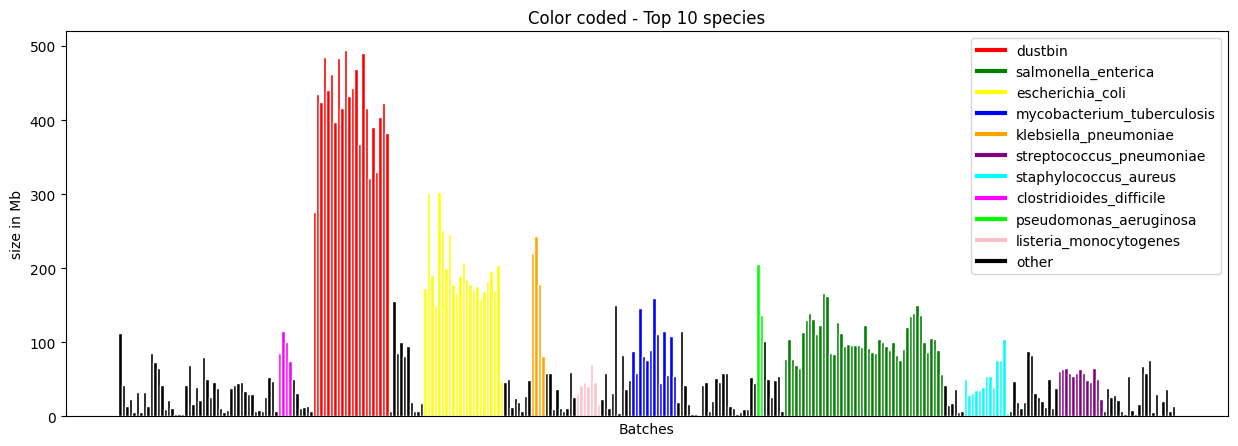

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))

df_plot = data.loc[:,'size_Mb']

files = df_plot.index.values
sizes = df_plot.values

bar_colors = [color.lower() for color in data.loc[:,'colors'].values]

# ax.bar(files, counts, label=bar_labels, color=bar_colors)
ax.bar(files, sizes, color=bar_colors,width=1, ec = 'white')

ax.set_ylabel('size in Mb')
ax.set_xlabel('Batches')
ax.set_title('Color coded - Top 10 species')

species_colors = colors
labels = list(df_group_by_species.index.values[:10]) + ['other']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in species_colors]
ax.legend(lines,labels)
plt.xticks([])

plt.show()

In [14]:
data_tuber = data[data.index.str.contains('mycobacterium_tuberculosis')] 

In [16]:
data_tuber['size_Mb']

name
./mycobacterium_tuberculosis__01.tar.xz     89
./mycobacterium_tuberculosis__02.tar.xz     58
./mycobacterium_tuberculosis__03.tar.xz    146
./mycobacterium_tuberculosis__04.tar.xz     81
./mycobacterium_tuberculosis__05.tar.xz     76
./mycobacterium_tuberculosis__06.tar.xz     90
./mycobacterium_tuberculosis__07.tar.xz    160
./mycobacterium_tuberculosis__08.tar.xz    111
./mycobacterium_tuberculosis__09.tar.xz     45
./mycobacterium_tuberculosis__10.tar.xz    116
./mycobacterium_tuberculosis__11.tar.xz     56
./mycobacterium_tuberculosis__12.tar.xz    108
./mycobacterium_tuberculosis__13.tar.xz     54
Name: size_Mb, dtype: int64